In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
import matplotlib.pyplot as plt

MODEL_NO_QUANT_TFLITE = 'model_no_quant.tflite'
MODEL_TFLITE = 'model.tflite'
MODEL_TFLITE_MICRO = 'model.cc'

In [2]:
#The data processing for the training and testing data sets
def data_train(filename, split = True):
    train_data = pd.read_excel(filename)
    train_data['Data'] = train_data['Data'] / 10000000
    
    tmp = train_data[['Data']].copy()

    X = pd.DataFrame(tmp).to_numpy()
    X = np.float32(X)
    
    if split == True:
        m = X.shape[0]
        Y = np.array([train_data['Active Attack'].values])
        Y = np.float32(Y)
        Y = Y.T
        
        #Shuffle (X, Y)
        permutation = list(np.random.permutation(m))
        shuff_X = X[permutation, :]
        shuff_Y = Y[permutation, :]
    
        devM = round(m * .3) # 30% of the set
        devM2 = m - devM # 70% of the set
        devM3 = round(devM / 2) #15% of the set
        
        train_X = shuff_X[0:(devM2), :]
        train_Y = shuff_Y[0:(devM2), :]
        dev_X = shuff_X[-(devM):-(devM3), :]
        dev_Y = shuff_Y[-(devM):-(devM3), :]
        test_X = shuff_X[-(devM3):, :]
        test_Y = shuff_Y[-(devM3):, :]
        
        m_train = train_X.shape[0]
        m_dev = dev_X.shape[0]
        m_test = test_X.shape[0]
        
        print ("Number of training examples: m_train = " + str(m_train))
        print ("train_set_x shape: " + str(train_X.shape))
        print ("train_set_y shape: " + str(train_Y.shape))
        print ("Number of dev examples: m_test = " + str(m_dev))
        print ("test_set_x shape: " + str(dev_X.shape))
        print ("test_set_y shape: " + str(dev_Y.shape))       
        print ("Number of testing examples: m_train = " + str(m_test))
        print ("train_set_x shape: " + str(test_X.shape))
        print ("train_set_y shape: " + str(test_Y.shape))
    
        return train_X, train_Y, dev_X, dev_Y, test_X, test_Y
    
    return X
    
train_X, train_Y, dev_X, dev_Y, test_X, test_Y = data_train("PuttyData.xlsx", split = True)

Number of training examples: m_train = 910
train_set_x shape: (910, 1)
train_set_y shape: (910, 1)
Number of dev examples: m_test = 195
test_set_x shape: (195, 1)
test_set_y shape: (195, 1)
Number of testing examples: m_train = 195
train_set_x shape: (195, 1)
train_set_y shape: (195, 1)


In [3]:
model = tf.keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(1,)))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(train_X, train_Y, epochs=600, batch_size=64,
                    validation_data=(dev_X, dev_Y))

Train on 910 samples, validate on 195 samples
Epoch 1/600
910/910 [==============================] - 1s 940us/sample - loss: 0.6345 - mae: 0.7557 - val_loss: 0.3655 - val_mae: 0.5758
Epoch 2/600
910/910 [==============================] - 0s 97us/sample - loss: 0.2358 - mae: 0.4160 - val_loss: 0.1653 - val_mae: 0.2758
Epoch 3/600
910/910 [==============================] - 0s 93us/sample - loss: 0.1584 - mae: 0.3142 - val_loss: 0.1531 - val_mae: 0.3060
Epoch 4/600
910/910 [==============================] - 0s 91us/sample - loss: 0.1384 - mae: 0.2546 - val_loss: 0.1377 - val_mae: 0.2510
Epoch 5/600
910/910 [==============================] - 0s 92us/sample - loss: 0.1254 - mae: 0.2261 - val_loss: 0.1241 - val_mae: 0.2320
Epoch 6/600
910/910 [==============================] - 0s 91us/sample - loss: 0.1147 - mae: 0.2197 - val_loss: 0.1134 - val_mae: 0.2082
Epoch 7/600
910/910 [==============================] - 0s 91us/sample - loss: 0.1055 - mae: 0.2030 - val_loss: 0.1047 - val_mae: 0.2011
E

910/910 [==============================] - 0s 85us/sample - loss: 0.0123 - mae: 0.0222 - val_loss: 0.0136 - val_mae: 0.0330
Epoch 61/600
910/910 [==============================] - 0s 88us/sample - loss: 0.0118 - mae: 0.0318 - val_loss: 0.0138 - val_mae: 0.0228
Epoch 62/600
910/910 [==============================] - ETA: 0s - loss: 0.0274 - mae: 0.033 - 0s 84us/sample - loss: 0.0118 - mae: 0.0245 - val_loss: 0.0135 - val_mae: 0.0266
Epoch 63/600
910/910 [==============================] - 0s 86us/sample - loss: 0.0115 - mae: 0.0252 - val_loss: 0.0134 - val_mae: 0.0269
Epoch 64/600
910/910 [==============================] - 0s 80us/sample - loss: 0.0115 - mae: 0.0261 - val_loss: 0.0134 - val_mae: 0.0301
Epoch 65/600
910/910 [==============================] - 0s 85us/sample - loss: 0.0114 - mae: 0.0249 - val_loss: 0.0133 - val_mae: 0.0287
Epoch 66/600
910/910 [==============================] - 0s 81us/sample - loss: 0.0113 - mae: 0.0246 - val_loss: 0.0133 - val_mae: 0.0289
Epoch 67/600
910

910/910 [==============================] - 0s 99us/sample - loss: 0.0101 - mae: 0.0272 - val_loss: 0.0116 - val_mae: 0.0290
Epoch 120/600
910/910 [==============================] - 0s 93us/sample - loss: 0.0097 - mae: 0.0222 - val_loss: 0.0116 - val_mae: 0.0257
Epoch 121/600
910/910 [==============================] - 0s 93us/sample - loss: 0.0098 - mae: 0.0259 - val_loss: 0.0116 - val_mae: 0.0270
Epoch 122/600
910/910 [==============================] - 0s 90us/sample - loss: 0.0098 - mae: 0.0250 - val_loss: 0.0116 - val_mae: 0.0323
Epoch 123/600
910/910 [==============================] - 0s 95us/sample - loss: 0.0097 - mae: 0.0241 - val_loss: 0.0114 - val_mae: 0.0241
Epoch 124/600
910/910 [==============================] - 0s 97us/sample - loss: 0.0098 - mae: 0.0261 - val_loss: 0.0116 - val_mae: 0.0260
Epoch 125/600
910/910 [==============================] - 0s 92us/sample - loss: 0.0097 - mae: 0.0241 - val_loss: 0.0115 - val_mae: 0.0298
Epoch 126/600
910/910 [=========================

910/910 [==============================] - 0s 96us/sample - loss: 0.0087 - mae: 0.0250 - val_loss: 0.0101 - val_mae: 0.0237
Epoch 179/600
910/910 [==============================] - 0s 92us/sample - loss: 0.0086 - mae: 0.0223 - val_loss: 0.0100 - val_mae: 0.0244
Epoch 180/600
910/910 [==============================] - 0s 88us/sample - loss: 0.0084 - mae: 0.0213 - val_loss: 0.0098 - val_mae: 0.0219
Epoch 181/600
910/910 [==============================] - 0s 91us/sample - loss: 0.0083 - mae: 0.0234 - val_loss: 0.0098 - val_mae: 0.0281
Epoch 182/600
910/910 [==============================] - 0s 96us/sample - loss: 0.0083 - mae: 0.0228 - val_loss: 0.0098 - val_mae: 0.0263
Epoch 183/600
910/910 [==============================] - 0s 90us/sample - loss: 0.0083 - mae: 0.0235 - val_loss: 0.0097 - val_mae: 0.0252
Epoch 184/600
910/910 [==============================] - 0s 90us/sample - loss: 0.0084 - mae: 0.0260 - val_loss: 0.0098 - val_mae: 0.0307
Epoch 185/600
910/910 [=========================

910/910 [==============================] - 0s 88us/sample - loss: 0.0034 - mae: 0.0201 - val_loss: 0.0027 - val_mae: 0.0177
Epoch 238/600
910/910 [==============================] - 0s 91us/sample - loss: 0.0035 - mae: 0.0223 - val_loss: 0.0027 - val_mae: 0.0254
Epoch 239/600
910/910 [==============================] - 0s 91us/sample - loss: 0.0028 - mae: 0.0158 - val_loss: 0.0025 - val_mae: 0.0229
Epoch 240/600
910/910 [==============================] - 0s 95us/sample - loss: 0.0027 - mae: 0.0178 - val_loss: 0.0020 - val_mae: 0.0135
Epoch 241/600
910/910 [==============================] - 0s 85us/sample - loss: 0.0027 - mae: 0.0173 - val_loss: 0.0022 - val_mae: 0.0183
Epoch 242/600
910/910 [==============================] - 0s 97us/sample - loss: 0.0027 - mae: 0.0178 - val_loss: 0.0019 - val_mae: 0.0207
Epoch 243/600
910/910 [==============================] - 0s 95us/sample - loss: 0.0025 - mae: 0.0169 - val_loss: 0.0016 - val_mae: 0.0123
Epoch 244/600
910/910 [=========================

Epoch 295/600
910/910 [==============================] - 0s 91us/sample - loss: 0.0012 - mae: 0.0074 - val_loss: 7.1753e-05 - val_mae: 0.0051
Epoch 296/600
910/910 [==============================] - 0s 88us/sample - loss: 0.0013 - mae: 0.0078 - val_loss: 8.4429e-05 - val_mae: 0.0052
Epoch 297/600
910/910 [==============================] - 0s 87us/sample - loss: 0.0012 - mae: 0.0076 - val_loss: 1.1258e-04 - val_mae: 0.0075
Epoch 298/600
910/910 [==============================] - 0s 84us/sample - loss: 0.0013 - mae: 0.0103 - val_loss: 7.1868e-05 - val_mae: 0.0057
Epoch 299/600
910/910 [==============================] - 0s 80us/sample - loss: 0.0012 - mae: 0.0050 - val_loss: 9.7748e-05 - val_mae: 0.0078
Epoch 300/600
910/910 [==============================] - 0s 90us/sample - loss: 0.0013 - mae: 0.0102 - val_loss: 9.1243e-05 - val_mae: 0.0062
Epoch 301/600
910/910 [==============================] - 0s 97us/sample - loss: 0.0012 - mae: 0.0078 - val_loss: 5.4455e-05 - val_mae: 0.0035
Epoch 

910/910 [==============================] - 0s 98us/sample - loss: 0.0012 - mae: 0.0095 - val_loss: 1.6075e-04 - val_mae: 0.0103
Epoch 353/600
910/910 [==============================] - 0s 92us/sample - loss: 0.0012 - mae: 0.0085 - val_loss: 9.5314e-05 - val_mae: 0.0044
Epoch 354/600
910/910 [==============================] - 0s 99us/sample - loss: 0.0012 - mae: 0.0062 - val_loss: 1.0471e-04 - val_mae: 0.0051
Epoch 355/600
910/910 [==============================] - 0s 95us/sample - loss: 0.0012 - mae: 0.0062 - val_loss: 1.0630e-04 - val_mae: 0.0067
Epoch 356/600
910/910 [==============================] - 0s 91us/sample - loss: 0.0012 - mae: 0.0062 - val_loss: 6.1759e-05 - val_mae: 0.0045
Epoch 357/600
910/910 [==============================] - 0s 106us/sample - loss: 0.0012 - mae: 0.0074 - val_loss: 9.4516e-05 - val_mae: 0.0054
Epoch 358/600
910/910 [==============================] - 0s 95us/sample - loss: 0.0012 - mae: 0.0101 - val_loss: 7.1818e-05 - val_mae: 0.0060
Epoch 359/600
910/9

910/910 [==============================] - 0s 87us/sample - loss: 0.0012 - mae: 0.0076 - val_loss: 1.2860e-04 - val_mae: 0.0083
Epoch 410/600
910/910 [==============================] - 0s 99us/sample - loss: 0.0012 - mae: 0.0079 - val_loss: 6.6199e-05 - val_mae: 0.0049
Epoch 411/600
910/910 [==============================] - 0s 101us/sample - loss: 0.0012 - mae: 0.0068 - val_loss: 7.6324e-05 - val_mae: 0.0062
Epoch 412/600
910/910 [==============================] - 0s 95us/sample - loss: 0.0012 - mae: 0.0099 - val_loss: 3.9849e-05 - val_mae: 0.0026
Epoch 413/600
910/910 [==============================] - 0s 90us/sample - loss: 0.0012 - mae: 0.0071 - val_loss: 8.5519e-05 - val_mae: 0.0053
Epoch 414/600
910/910 [==============================] - 0s 87us/sample - loss: 0.0012 - mae: 0.0065 - val_loss: 7.9012e-05 - val_mae: 0.0051
Epoch 415/600
910/910 [==============================] - 0s 90us/sample - loss: 0.0012 - mae: 0.0052 - val_loss: 1.7619e-04 - val_mae: 0.0121
Epoch 416/600
910/9

Epoch 467/600
910/910 [==============================] - 0s 84us/sample - loss: 0.0012 - mae: 0.0056 - val_loss: 9.1128e-05 - val_mae: 0.0066
Epoch 468/600
910/910 [==============================] - 0s 82us/sample - loss: 0.0012 - mae: 0.0078 - val_loss: 9.2843e-05 - val_mae: 0.0062
Epoch 469/600
910/910 [==============================] - 0s 90us/sample - loss: 0.0012 - mae: 0.0076 - val_loss: 9.8301e-05 - val_mae: 0.0081
Epoch 470/600
910/910 [==============================] - 0s 91us/sample - loss: 0.0012 - mae: 0.0081 - val_loss: 1.2384e-04 - val_mae: 0.0077
Epoch 471/600
910/910 [==============================] - 0s 82us/sample - loss: 0.0012 - mae: 0.0074 - val_loss: 1.3051e-04 - val_mae: 0.0085
Epoch 472/600
910/910 [==============================] - 0s 82us/sample - loss: 0.0012 - mae: 0.0074 - val_loss: 1.1364e-04 - val_mae: 0.0079
Epoch 473/600
910/910 [==============================] - 0s 79us/sample - loss: 0.0012 - mae: 0.0071 - val_loss: 9.8127e-05 - val_mae: 0.0033
Epoch 

Epoch 525/600
910/910 [==============================] - 0s 86us/sample - loss: 0.0012 - mae: 0.0050 - val_loss: 2.4430e-05 - val_mae: 0.0033
Epoch 526/600
910/910 [==============================] - 0s 92us/sample - loss: 0.0012 - mae: 0.0060 - val_loss: 1.5488e-04 - val_mae: 0.0075
Epoch 527/600
910/910 [==============================] - 0s 81us/sample - loss: 0.0012 - mae: 0.0071 - val_loss: 8.4065e-05 - val_mae: 0.0056
Epoch 528/600
910/910 [==============================] - 0s 82us/sample - loss: 0.0012 - mae: 0.0054 - val_loss: 7.6258e-05 - val_mae: 0.0038
Epoch 529/600
910/910 [==============================] - 0s 91us/sample - loss: 0.0011 - mae: 0.0044 - val_loss: 5.5322e-05 - val_mae: 0.0039
Epoch 530/600
910/910 [==============================] - 0s 82us/sample - loss: 0.0011 - mae: 0.0062 - val_loss: 2.6388e-04 - val_mae: 0.0152
Epoch 531/600
910/910 [==============================] - 0s 97us/sample - loss: 0.0013 - mae: 0.0124 - val_loss: 2.2811e-04 - val_mae: 0.0119
Epoch 

Epoch 582/600
910/910 [==============================] - 0s 97us/sample - loss: 0.0012 - mae: 0.0061 - val_loss: 9.8445e-05 - val_mae: 0.0065
Epoch 583/600
910/910 [==============================] - 0s 100us/sample - loss: 0.0012 - mae: 0.0064 - val_loss: 1.6995e-04 - val_mae: 0.0102
Epoch 584/600
910/910 [==============================] - 0s 81us/sample - loss: 0.0012 - mae: 0.0080 - val_loss: 1.5291e-04 - val_mae: 0.0093
Epoch 585/600
910/910 [==============================] - 0s 81us/sample - loss: 0.0012 - mae: 0.0099 - val_loss: 5.7513e-04 - val_mae: 0.0151
Epoch 586/600
910/910 [==============================] - 0s 84us/sample - loss: 0.0012 - mae: 0.0093 - val_loss: 1.0845e-04 - val_mae: 0.0074
Epoch 587/600
910/910 [==============================] - 0s 92us/sample - loss: 0.0012 - mae: 0.0067 - val_loss: 1.2424e-04 - val_mae: 0.0077
Epoch 588/600
910/910 [==============================] - 0s 95us/sample - loss: 0.0012 - mae: 0.0066 - val_loss: 6.4534e-05 - val_mae: 0.0062
Epoch

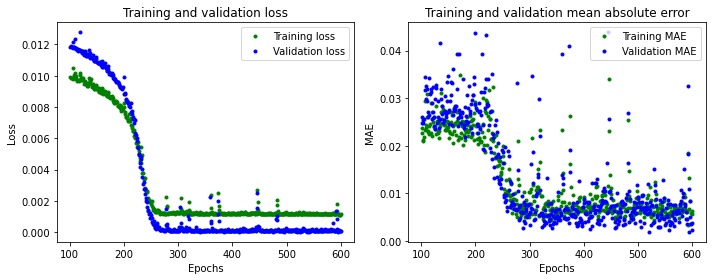

In [4]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

SKIP = 100

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)

mae = history.history['mae']
val_mae = history.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()

195/195 [==============================] - 0s 108us/sample - loss: 1.2730e-05 - mae: 0.0014


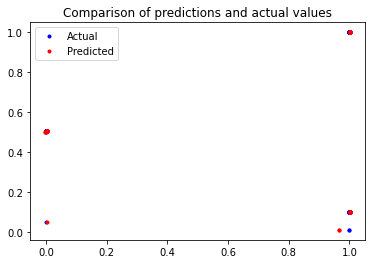

In [5]:
# Calculate and print the loss on our test dataset
loss = model.evaluate(test_X, test_Y)

# Make predictions based on our test dataset
predictions = model.predict(test_X)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(test_Y, test_X, 'b.', label='Actual')
plt.plot(predictions, test_X, 'r.', label='Predicted')
plt.legend()
plt.show()

In [6]:
# load model
#model = load_model('model.h5')
# summarize model.
#model.summary()

model.save("model_TinyML.h5")
print("Saved model to disk")

Saved model to disk


In [7]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Convert the model to the TensorFlow Lite format with quantization
def representative_dataset():
  for i in range(train_X.shape[0]):
    yield([train_X[i].reshape(1, 1)])
# Set the optimization flag.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Enforce full-int8 quantization (except inputs/outputs which are always float)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# Provide a representative dataset to ensure we quantize correctly.
converter.representative_dataset = representative_dataset
model_tflite = converter.convert()

# Save the model to disk
open(MODEL_TFLITE, "wb").write(model_tflite)

import os
model_size = os.path.getsize(MODEL_TFLITE)
print("Quantized model is %d bytes" % model_size)

Quantized model is 6360 bytes


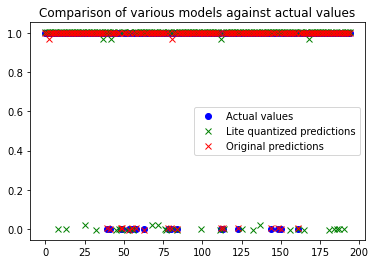

In [8]:
# Instantiate an interpreter for the model
model = tf.lite.Interpreter(MODEL_TFLITE)

# Allocate memory for the model
model.allocate_tensors()

# Get the input and output tensors so we can feed in values and get the results
model_input = model.tensor(model.get_input_details()[0]["index"])
model_output = model.tensor(model.get_output_details()[0]["index"])

# Create arrays to store the results
model_predictions = np.empty(test_X.shape[0])

# Run each model's interpreter for each value and store the results in arrays
for i in range(test_X.size):
  model.set_tensor(model.get_input_details()[0]["index"], train_X[i].reshape(1,1))
  model.invoke()
  model_predictions[i] = model_output()[0]

# See how they line up with the data
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(test_Y, 'bo', label='Actual values')
plt.plot(model_predictions, 'gx', label='Lite quantized predictions')
plt.plot(predictions, 'rx', label='Original predictions')
plt.legend()
plt.show()